# CS 525 Assignment 1
Sirut Buasai, sbuasai2@wpi.edu

### Imports and Downloads

In [1]:
# libraries
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data retrieval and processing

In [2]:
# load data from csv files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [3]:
# clean real data by removing punctuations and special characters and convert string to lower case
real_data = real_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
real_data['text'] = real_data['text'].str.lower()
real_data.head()

,title,text,subject,date
0,As U S budget fight looms Republicans flip the...,washington reuters the head of a conservative ...,politicsNews,December 31 2017
1,U S military to accept transgender recruits on...,washington reuters transgender people will be ...,politicsNews,December 29 2017
2,Senior U S Republican senator Let Mr Mueller d...,washington reuters the special counsel investi...,politicsNews,December 31 2017
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,December 30 2017
4,Trump wants Postal Service to charge much more...,seattle washington reuters president donald tr...,politicsNews,December 29 2017


In [4]:
# clean fake data by removing punctuations and special characters and convert string to lower case
fake_data = fake_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
fake_data['text'] = fake_data['text'].str.lower()
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year ...,donald trump just couldn t wish all americans ...,News,December 31 2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,December 31 2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,December 30 2017
3,Trump Is So Obsessed He Even Has Obama s Name...,on christmas day donald trump announced that h...,News,December 29 2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,December 25 2017


## Task 1: Explore Essential Information from Text Data and Preprocessing
### Text Tokenization

In [5]:
# tokenize real texts
real_data['tokenized_text'] = real_data['text'].apply(nltk.tokenize.word_tokenize)
real_tokens = real_data['tokenized_text'].explode()
real_tokens.dropna(inplace=True)
real_tokens = real_tokens.to_list()

# tokenize fake texts
fake_data['tokenized_text'] = fake_data['text'].apply(nltk.tokenize.word_tokenize)
fake_tokens = fake_data['tokenized_text'].explode()
fake_tokens.dropna(inplace=True)
fake_tokens = fake_tokens.to_list()

# create collection of tokens from both real and fake tokens
collection_tokens = real_tokens + fake_tokens

print(f"Number of real tokens:\t{len(real_tokens)}")
print(f"Number of fake tokens:\t{len(fake_tokens)}")
print(f"Total number of tokens:\t{len(collection_tokens)}")

Number of real tokens:	8435968
Number of fake tokens:	10251160
Total number of tokens:	18687128


### Stop Word Removal

In [6]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
real_stop = [x for x in real_tokens if x not in stop_words]
fake_stop = [x for x in fake_tokens if x not in stop_words]
collection_stop = [x for x in collection_tokens if x not in stop_words]

print(f"Number of real tokens after stop word removal:\t{len(real_stop)}")
print(f"Number of fake tokens after stop word removal:\t{len(fake_stop)}")
print(f"Total number of tokens after stop word removal:\t{len(collection_stop)}")

Number of real tokens after stop word removal:	5037632
Number of fake tokens after stop word removal:	5724253
Total number of tokens after stop word removal:	10761885


### Text Lemminization

In [7]:
# lemmatize tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
real_lemm = [lemmatizer.lemmatize(x) for x in real_stop]
fake_lemm = [lemmatizer.lemmatize(x) for x in fake_stop]
collection_lemm = [lemmatizer.lemmatize(x) for x in collection_stop]

print(f"Number of real tokens after lemminization:\t{len(real_stop)}")
print(f"Number of fake tokens after lemminization:\t{len(fake_stop)}")
print(f"Total number of tokens after lemminization:\t{len(collection_stop)}")

Number of real tokens after lemminization:	5037632
Number of fake tokens after lemminization:	5724253
Total number of tokens after lemminization:	10761885


### Calculate Top 100 Common Words and WordCloud Analysis

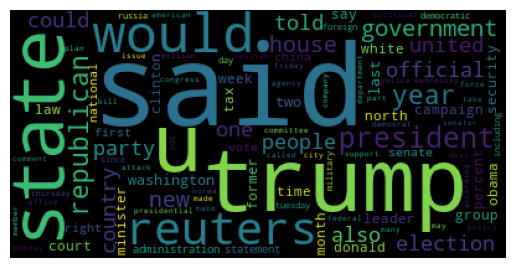

In [8]:
# retrieve top 100 most common words for real data
real_freq = nltk.FreqDist(real_lemm).most_common(100)

# download tables to excel spreadsheet
real_df = pd.DataFrame(data=dict(real_freq), index=[0])
real_df = (real_df.T)
real_df.to_excel('real_freq.xlsx')

# create wordcloud for analysis
real_wordcloud = WordCloud().generate_from_frequencies(dict(real_freq))
plt.imshow(real_wordcloud)
plt.axis('off')
plt.show()

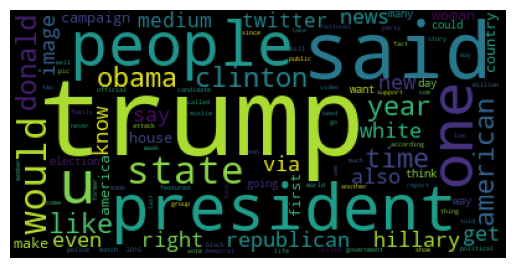

In [9]:
# retrieve top 100 most common words for fake data
fake_freq = nltk.FreqDist(fake_lemm).most_common(100)

# download tables to excel spreadsheet
fake_df = pd.DataFrame(data=dict(fake_freq), index=[0])
fake_df = (fake_df.T)
fake_df.to_excel('fake_freq.xlsx')

# create wordcloud for analysis
fake_wordcloud = WordCloud().generate_from_frequencies(dict(fake_freq))
plt.imshow(fake_wordcloud)
plt.axis('off')
plt.show()

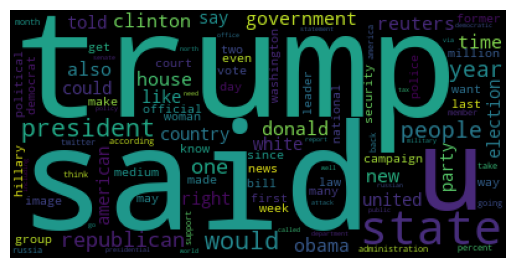

In [10]:
# retrieve top 100 most common words for real data
collection_freq = nltk.FreqDist(collection_lemm).most_common(100)

# download tables to excel spreadsheet
collection_df = pd.DataFrame(data=dict(collection_freq), index=[0])
collection_df = (collection_df.T)
collection_df.to_excel('collection_freq.xlsx')

# create wordcloud for analysis
collection_wordcloud = WordCloud().generate_from_frequencies(dict(collection_freq))
plt.imshow(collection_wordcloud)
plt.axis('off')
plt.show()

## Task 2: Build Machine Learning Model
### Data Preprocessing

In [11]:
# create labels for real and fake data
real_data['label'] = 1
fake_data['label'] = 0

# extract text and label
real_raw = real_data[['tokenized_text', 'label']]
fake_raw = fake_data[['tokenized_text', 'label']]

# combine the real and fake data
data_raw = pd.concat([real_raw, fake_raw])
data_raw = data_raw.sample(frac=1).reset_index(drop=True)

# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
data_raw['stop_removed_text'] = data_raw['tokenized_text'].apply(lambda sentence: [word for word in sentence if word not in stop_words])

# lemmatize tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
data_raw['lemmatized_text'] = data_raw['stop_removed_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])

# clean tokens into one string
lemmatizer = nltk.stem.WordNetLemmatizer()
data_raw['cleaned_text'] = data_raw['lemmatized_text'].apply(lambda sentence: ' '.join([word for word in sentence]))
data_raw.head()

,tokenized_text,label,stop_removed_text,lemmatized_text,cleaned_text
0,"[reuters, democratic, u, s, presidential, nomi...",1,"[reuters, democratic, u, presidential, nominee...","[reuters, democratic, u, presidential, nominee...",reuters democratic u presidential nominee hill...
1,"[united, nations, reuters, reacting, to, remar...",1,"[united, nations, reuters, reacting, remarks, ...","[united, nation, reuters, reacting, remark, no...",united nation reuters reacting remark north ko...
2,"[the, deschutes, county, sheriff, s, office, s...",0,"[deschutes, county, sheriff, office, says, sho...","[deschutes, county, sheriff, office, say, shoo...",deschutes county sheriff office say shooting l...
3,"[mecca, reuters, more, than, two, million, pil...",1,"[mecca, reuters, two, million, pilgrims, parti...","[mecca, reuters, two, million, pilgrim, partic...",mecca reuters two million pilgrim participatin...
4,"[the, bundy, empire, has, crumbled, thursday, ...",0,"[bundy, empire, crumbled, thursday, morning, w...","[bundy, empire, crumbled, thursday, morning, w...",bundy empire crumbled thursday morning welfare...


### Create Training Testing Split

In [12]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw['cleaned_text'], data_raw['label'], test_size=0.3)
train_x.head()

5696     fox news literally pretending treated presiden...
25666    obama war america every possible front last we...
9959     washington reuters trump administration said f...
30613    21st century wire say tidal wave revelation po...
16515    brussels reuters u secretary state rex tillers...
Name: cleaned_text, dtype: object

### TF-IDF Feature Set

In [13]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

tfidf_train_x = tfidf_vect.fit_transform(train_x)
tfidf_test_x = tfidf_vect.transform(test_x)

#### Logistic Regression on TF-IDF Feature Set

In [14]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9810087173100872
Recall score:		0.9865372573575454
Accuracy score:		0.984558277654046


#### Multinomial Naive Bayes on TF-IDF Feature Set

In [15]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9354889342332444
Recall score:		0.9329993738259236
Accuracy score:		0.9377134372680029


### Bag of Words Feature Set

In [16]:
# create Bag of Words feature set
bow_vect = CountVectorizer()

bow_train_x = bow_vect.fit_transform(train_x)
bow_test_x = bow_vect.transform(test_x)

#### Logistic Regression on Bag of Words Feature Set

In [17]:
# perform logistic regresstion model on Bag of Words feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9946875
Recall score:		0.9965560425798372
Accuracy score:		0.9958426132145508


#### Multinomial Naive Bayes on Bag of Words Feature Set

In [18]:
# perform logistic regresstion model on Bag of Words feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9445219277855261
Recall score:		0.9541327489041954
Accuracy score:		0.9516703786191537


### Confusion Matrix on Top 2 Models
#### Rank 1: Logistic Regression on Bag of Words Feature Set

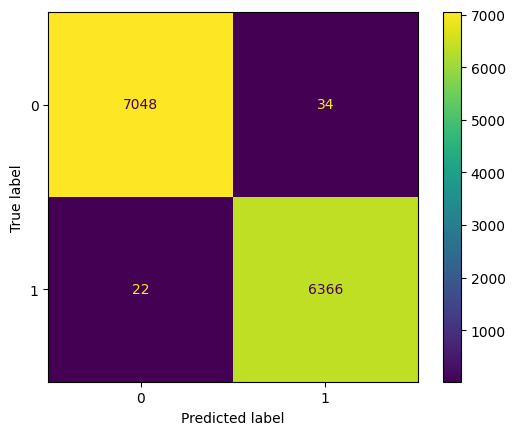

In [19]:
ConfusionMatrixDisplay.from_estimator(bow_log, bow_test_x, test_y)

#### Rank 2: Logistic Regression on TF-IDF Feature Set

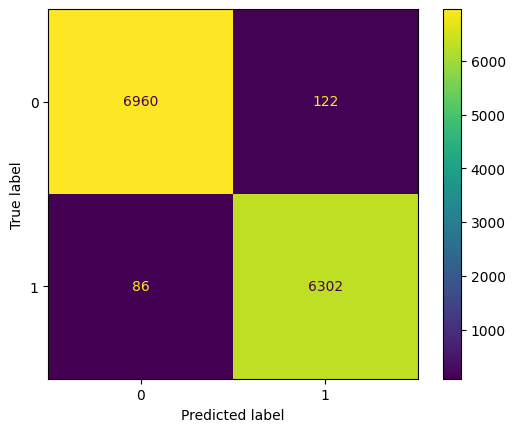

In [20]:
ConfusionMatrixDisplay.from_estimator(tfidf_log, tfidf_test_x, test_y)

## Task 3: Enhanced NLP Features

In [21]:
# reuse dataframe from task 2 that includes both real and fake data
data_raw.head()

,tokenized_text,label,stop_removed_text,lemmatized_text,cleaned_text
0,"[reuters, democratic, u, s, presidential, nomi...",1,"[reuters, democratic, u, presidential, nominee...","[reuters, democratic, u, presidential, nominee...",reuters democratic u presidential nominee hill...
1,"[united, nations, reuters, reacting, to, remar...",1,"[united, nations, reuters, reacting, remarks, ...","[united, nation, reuters, reacting, remark, no...",united nation reuters reacting remark north ko...
2,"[the, deschutes, county, sheriff, s, office, s...",0,"[deschutes, county, sheriff, office, says, sho...","[deschutes, county, sheriff, office, say, shoo...",deschutes county sheriff office say shooting l...
3,"[mecca, reuters, more, than, two, million, pil...",1,"[mecca, reuters, two, million, pilgrims, parti...","[mecca, reuters, two, million, pilgrim, partic...",mecca reuters two million pilgrim participatin...
4,"[the, bundy, empire, has, crumbled, thursday, ...",0,"[bundy, empire, crumbled, thursday, morning, w...","[bundy, empire, crumbled, thursday, morning, w...",bundy empire crumbled thursday morning welfare...


### Stop Word Removal

### POS Tagging

In [22]:
# POS tag the tokenized text without stop words
data_raw['pos_tagged_text'] = nltk.pos_tag_sents(data_raw['lemmatized_text'])
data_raw.head()

,tokenized_text,label,stop_removed_text,lemmatized_text,cleaned_text,pos_tagged_text
0,"[reuters, democratic, u, s, presidential, nomi...",1,"[reuters, democratic, u, presidential, nominee...","[reuters, democratic, u, presidential, nominee...",reuters democratic u presidential nominee hill...,"[(reuters, NNS), (democratic, JJ), (u, JJ), (p..."
1,"[united, nations, reuters, reacting, to, remar...",1,"[united, nations, reuters, reacting, remarks, ...","[united, nation, reuters, reacting, remark, no...",united nation reuters reacting remark north ko...,"[(united, JJ), (nation, NN), (reuters, NNS), (..."
2,"[the, deschutes, county, sheriff, s, office, s...",0,"[deschutes, county, sheriff, office, says, sho...","[deschutes, county, sheriff, office, say, shoo...",deschutes county sheriff office say shooting l...,"[(deschutes, NNS), (county, VBP), (sheriff, JJ..."
3,"[mecca, reuters, more, than, two, million, pil...",1,"[mecca, reuters, two, million, pilgrims, parti...","[mecca, reuters, two, million, pilgrim, partic...",mecca reuters two million pilgrim participatin...,"[(mecca, NN), (reuters, NNS), (two, CD), (mill..."
4,"[the, bundy, empire, has, crumbled, thursday, ...",0,"[bundy, empire, crumbled, thursday, morning, w...","[bundy, empire, crumbled, thursday, morning, w...",bundy empire crumbled thursday morning welfare...,"[(bundy, NN), (empire, NN), (crumbled, VBD), (..."


In [23]:
# list of POS tags from https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# 3 filters given the frequency of nouns in fake news and verbs in real news
nouns = ['NN', 'NNS', 'NNP', 'NNPS']
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VPZ']
nouns_verbs = nouns + verbs

# apply filters to the data
data_raw['nouns'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns]))
data_raw['verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in verbs]))
data_raw['nouns_verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns_verbs]))
data_raw.head()

,tokenized_text,label,stop_removed_text,lemmatized_text,cleaned_text,pos_tagged_text,nouns,verbs,nouns_verbs
0,"[reuters, democratic, u, s, presidential, nomi...",1,"[reuters, democratic, u, presidential, nominee...","[reuters, democratic, u, presidential, nominee...",reuters democratic u presidential nominee hill...,"[(reuters, NNS), (democratic, JJ), (u, JJ), (p...",reuters nominee clinton rival donald trump fac...,televised prove take scheduled appeared provid...,reuters nominee clinton rival donald trump fac...
1,"[united, nations, reuters, reacting, to, remar...",1,"[united, nations, reuters, reacting, remarks, ...","[united, nation, reuters, reacting, remark, no...",united nation reuters reacting remark north ko...,"[(united, JJ), (nation, NN), (reuters, NNS), (...",nation reuters remark minister china ambassado...,reacting told escalating getting told declared...,nation reuters reacting remark minister china ...
2,"[the, deschutes, county, sheriff, s, office, s...",0,"[deschutes, county, sheriff, office, says, sho...","[deschutes, county, sheriff, office, say, shoo...",deschutes county sheriff office say shooting l...,"[(deschutes, NNS), (county, VBP), (sheriff, JJ...",deschutes office lavoy finicum cell phone foot...,county say shooting justified shocking capture...,deschutes county office say shooting lavoy fin...
3,"[mecca, reuters, more, than, two, million, pil...",1,"[mecca, reuters, two, million, pilgrims, parti...","[mecca, reuters, two, million, pilgrim, partic...",mecca reuters two million pilgrim participatin...,"[(mecca, NN), (reuters, NNS), (two, CD), (mill...",mecca reuters week mecca prayer world gatherin...,participating began returning said seen strugg...,mecca reuters participating week began returni...
4,"[the, bundy, empire, has, crumbled, thursday, ...",0,"[bundy, empire, crumbled, thursday, morning, w...","[bundy, empire, crumbled, thursday, morning, w...",bundy empire crumbled thursday morning welfare...,"[(bundy, NN), (empire, NN), (crumbled, VBD), (...",bundy empire morning welfare cowboy time son b...,crumbled arrived arrested aiding armed includi...,bundy empire crumbled morning welfare cowboy a...


### Create Training Testing Split

In [24]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw[['nouns', 'verbs', 'nouns_verbs']], data_raw['label'], test_size=0.3)
train_x.head()

,nouns,verbs,nouns_verbs
40257,loretta obama justifies ideology believe shake...,feel mean wronged gotten voting understand rep...,loretta obama feel justifies mean ideology wro...
28823,washington reuters economy secretary ildefonso...,said improved denied said believed believe ren...,washington reuters economy secretary ildefonso...
34279,reuters birdie thomas pieters johnson duo shar...,zach gave bridgestone looking birdied moved ak...,reuters birdie thomas pieters zach johnson gav...
8844,washington reuters house representative thursd...,took averting approving fund help expected,washington reuters house representative thursd...
27918,seriousness secret intel world email server wa...,cared exposing using american put voter leave ...,cared seriousness exposing secret intel world ...


### TF-IDF Feature Set (Noun, Verb, Noun+Verb)

In [25]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

# nouns
tfidf_train_nouns_x = tfidf_vect.fit_transform(train_x['nouns'])
tfidf_test_nouns_x = tfidf_vect.transform(test_x['nouns'])

# verbs
tfidf_train_verbs_x = tfidf_vect.fit_transform(train_x['verbs'])
tfidf_test_verbs_x = tfidf_vect.transform(test_x['verbs'])

# nouns_verbs
tfidf_train_nouns_verbs_x = tfidf_vect.fit_transform(train_x['nouns_verbs'])
tfidf_test_nouns_verbs_x = tfidf_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on TF-IDF Noun Feature Set

In [26]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9815480844409695
Recall score:		0.9786404739632055
Accuracy score:		0.9810690423162584


#### Logistic Regression on TF-IDF Verb Feature Set

In [27]:
# train model on training set
tfidf_log.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9324783683559951
Recall score:		0.9409105082631743
Accuracy score:		0.9394209354120268


#### Logistic Regression on TF-IDF Noun+Verb Feature Set

In [28]:
# train model on training set
tfidf_log.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.98
Recall score:		0.9855004677268475
Accuracy score:		0.9835189309576837


#### Multinomial Naive Bayes on TF-IDF Noun Feature Set

In [29]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9213677907343208
Recall score:		0.9115996258185219
Accuracy score:		0.9208611729769859


#### Multinomial Naive Bayes on TF-IDF Verb Feature Set

In [30]:
# train model on training set
tfidf_mnb.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9178826451412605
Recall score:		0.921889616463985
Accuracy score:		0.9235337787676318


#### Multinomial Naive Bayes on TF-IDF Noun+Verb Feature Set

In [31]:
# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9260299625468165
Recall score:		0.9251637043966323
Accuracy score:		0.9291759465478842


### Bag of Words Feature Set (Noun, Verb, Noun+Verb)

In [32]:
# create TF-IDF feature set
bow_vect = CountVectorizer()

# nouns
bow_train_nouns_x = bow_vect.fit_transform(train_x['nouns'])
bow_test_nouns_x = bow_vect.transform(test_x['nouns'])

# verbs
bow_train_verbs_x = bow_vect.fit_transform(train_x['verbs'])
bow_test_verbs_x = bow_vect.transform(test_x['verbs'])

# nouns_verbs
bow_train_nouns_verbs_x = bow_vect.fit_transform(train_x['nouns_verbs'])
bow_test_nouns_verbs_x = bow_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on Bag of Words Noun Feature Set

In [33]:
# perform logistic regresstion model on TF-IDF feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9935867354919443
Recall score:		0.9903336451512317
Accuracy score:		0.9923533778767631


#### Logistic Regression on Bag of Words Verb Feature Set

In [34]:
# train model on training set
bow_log.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.94868566031796
Recall score:		0.9396632366697848
Accuracy score:		0.9470675575352635


#### Logistic Regression on Bag of Words Noun+Verb Feature Set

In [35]:
# train model on training set
bow_log.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9951585194440106
Recall score:		0.9934518241347053
Accuracy score:		0.9945805493689681


#### Multinomial Naive Bayes on Bag of Words Noun Feature Set

In [36]:
# perform multinomial naive bayes model on TF-IDF feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9295120061967467
Recall score:		0.9354536950420954
Accuracy score:		0.9354862657757981


#### Multinomial Naive Bayes on Bag of Words Verb Feature Set

In [37]:
# train model on training set
bow_mnb.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9207399608963754
Recall score:		0.9544745868412847
Accuracy score:		0.9391982182628063


#### Multinomial Naive Bayes on Bag of Words Noun+Verb Feature Set

In [38]:
# train model on training set
bow_mnb.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.938098178450139
Recall score:		0.947458684128469
Accuracy score:		0.9452115812917594
